**OBJECTIVE:  TRY OUT VARIOUS MLP ON MNIST DATA **

In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [8]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:

from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [10]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

**MODEL 1** **WITH TWO HIDDEN LAYERS**

In [20]:
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512       
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total para

In [21]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.4899 - acc: 0.8517 - val_loss: 0.1591 - val_acc: 0.9490
Epoch 2/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.2273 - acc: 0.9325 - val_loss: 0.1091 - val_acc: 0.9650
Epoch 3/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.1733 - acc: 0.9476 - val_loss: 0.0894 - val_acc: 0.9710
Epoch 4/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.1491 - acc: 0.9542 - val_loss: 0.0841 - val_acc: 0.9719
Epoch 5/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.1303 - acc: 0.9606 - val_loss: 0.0767 - val_acc: 0.9756
Epoch 6/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.1147 - acc: 0.9646 - val_loss: 0.0675 - val_acc: 0.9802
Epoch 7/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.1067 - acc: 0.9667 - val_loss: 0.0654 - val_acc

Test score: 0.05918746108110063
Test accuracy: 0.9825


<IPython.core.display.Javascript object>


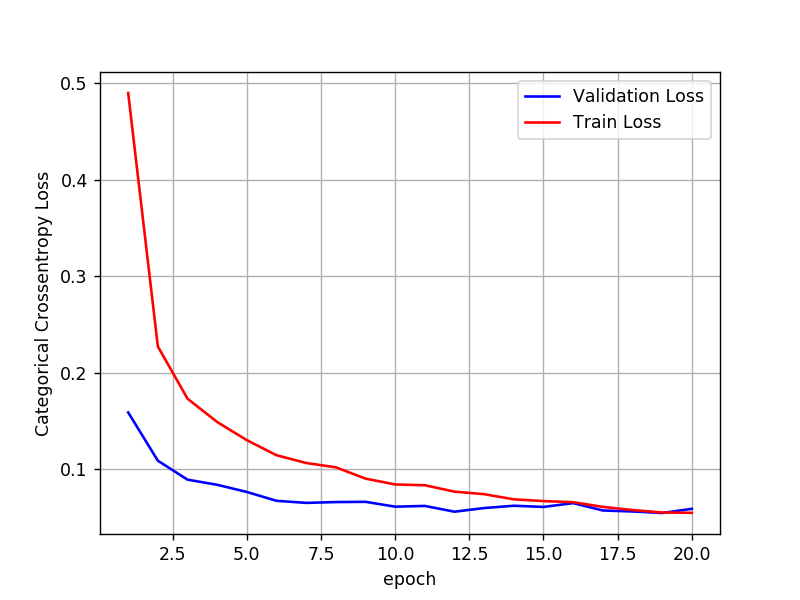

In [22]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**MODEL 2** **WITH THREE HIDDEN LAYERS**

In [23]:
model2_drop = Sequential()

model2_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)))
model2_drop.add(BatchNormalization())
model2_drop.add(Dropout(0.5))

model2_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model2_drop.add(BatchNormalization())
model2_drop.add(Dropout(0.5))

model2_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.17677, seed=None)) )
model2_drop.add(BatchNormalization())
model2_drop.add(Dropout(0.5))

model2_drop.add(Dense(output_dim, activation='softmax'))


model2_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)               512       
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
__________

In [24]:
model2_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model2_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.8028 - acc: 0.7517 - val_loss: 0.2124 - val_acc: 0.9331
Epoch 2/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.3383 - acc: 0.9032 - val_loss: 0.1495 - val_acc: 0.9563
Epoch 3/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.2558 - acc: 0.9282 - val_loss: 0.1136 - val_acc: 0.9642
Epoch 4/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.2099 - acc: 0.9413 - val_loss: 0.1044 - val_acc: 0.9688
Epoch 5/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1855 - acc: 0.9479 - val_loss: 0.0927 - val_acc: 0.9725
Epoch 6/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.1640 - acc: 0.9543 - val_loss: 0.0869 - val_acc: 0.9750
Epoch 7/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.1521 - acc: 0.9574 - val_loss: 0.0873 - val_ac

Test score: 0.059985510782385246
Test accuracy: 0.9833


<IPython.core.display.Javascript object>


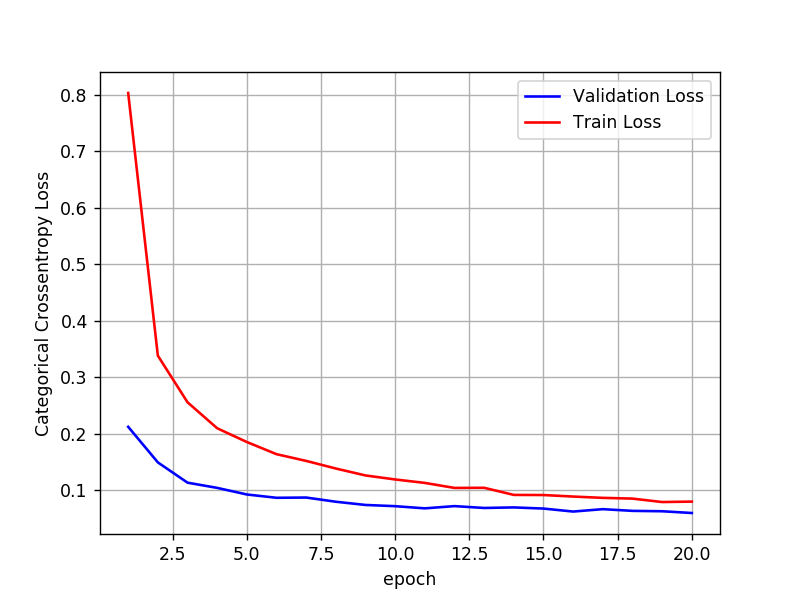

In [25]:
score = model2_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**MODEL 3** **WITH FIVE HIDDEN LAYERS**

In [26]:
model3_drop = Sequential()

model3_drop.add(Dense(784, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0505, seed=None)))
model3_drop.add(BatchNormalization())
model3_drop.add(Dropout(0.5))

model3_drop.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)) )
model3_drop.add(BatchNormalization())
model3_drop.add(Dropout(0.5))

model3_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model3_drop.add(BatchNormalization())
model3_drop.add(Dropout(0.5))

model3_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.17677, seed=None)) )
model3_drop.add(BatchNormalization())
model3_drop.add(Dropout(0.5))

model3_drop.add(Dense(16, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.35355, seed=None)) )
model3_drop.add(BatchNormalization())
model3_drop.add(Dropout(0.5))

model3_drop.add(Dense(output_dim, activation='softmax'))


model3_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 784)               615440    
_________________________________________________________________
batch_normalization_16 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_16 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_17 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               65664     
__________

In [27]:
model3_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model3_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 170us/step - loss: 1.5552 - acc: 0.4775 - val_loss: 0.4411 - val_acc: 0.8935
Epoch 2/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.7607 - acc: 0.7615 - val_loss: 0.2190 - val_acc: 0.9443
Epoch 3/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.5311 - acc: 0.8467 - val_loss: 0.1587 - val_acc: 0.9578
Epoch 4/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.4354 - acc: 0.8789 - val_loss: 0.1414 - val_acc: 0.9632
Epoch 5/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.3735 - acc: 0.8970 - val_loss: 0.1311 - val_acc: 0.9665
Epoch 6/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.3379 - acc: 0.9091 - val_loss: 0.1075 - val_acc: 0.9731
Epoch 7/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.3038 - acc: 0.9185 - val_loss: 0.1063 -

Test score: 0.08702929664043477
Test accuracy: 0.9827


<IPython.core.display.Javascript object>


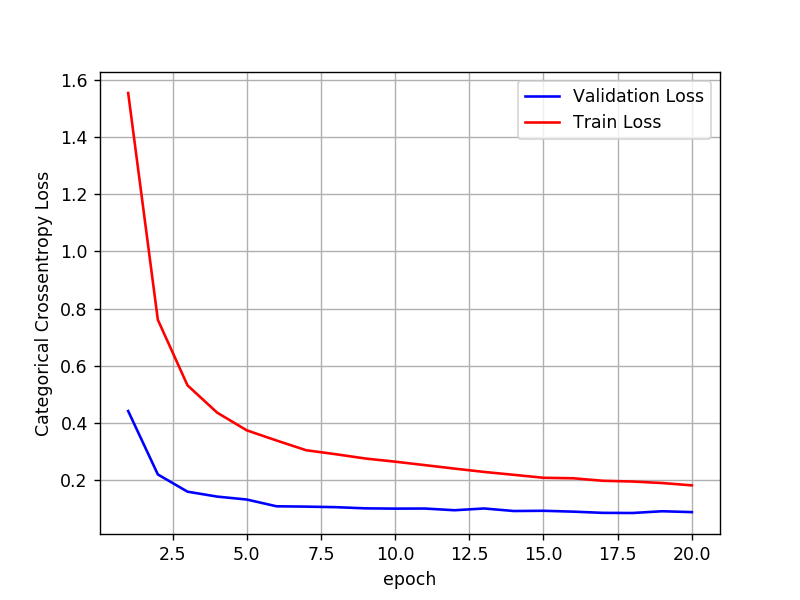

In [28]:
score = model3_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**SUMMARY-->**   **MODEL 2 WITH TWO HIDDEN LAYERS GAVE THE BEST ACCUARACY OF 98.33**